# Homework Assignment 3 - [30 points]


In this analysis, we will perform two case studies.



## <u>Case Study 1</u>: Artificial Dataset Scaling Analysis
Let's learn more about how data scaling choices might affect our cluster analysis results.

In this case study we will first perform a cluster analysis on a two dimensional, artificial dataset (**dataset2.csv**) that has not been scaled. Then we will perform a cluster analysis on the scaled dataset.

<hr>

### Hopkin's Statistic

The `pyclustertend` package does not seem to be well maintained. You may encounter issues installing and using this package for newer versions of Python. You can use this function instead to calculate the Hopkin's statistic. Note that the only input into this function is just the dataframe of variables that you would like to determine clusterability.

The $p$ value is already set to be the rule of thumb (10% of the number of observations in the dataset).

In [10]:
import numpy as np

from sklearn.neighbors import NearestNeighbors

def hopkins_stat(X):
    #1. Calculating parameters
    n, d = X.shape
    p = int(0.1 * n)

    #2. Calculating the u and w distances
    nbrs = NearestNeighbors(algorithm='auto').fit(X)
    rand_ind = np.random.choice(range(0, n, 1), p)
    u_dist, _ = nbrs.kneighbors(np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), (p, d)), 2)
    w_dist, _ = nbrs.kneighbors(X.iloc[rand_ind], 2)
    u_dist = u_dist[:, 1]
    w_dist = w_dist[:, 1]

    #3. Hopkin's Statistic
    h_stat = np.sum(w_dist) / (np.sum(u_dist) + np.sum(w_dist))

    return h_stat

### Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors




### 1. Unscaled Dataset Analysis

#### 1.1. Read dataset2.csv

Read the dataset2.csv file into a dataframe. You can assume that there are no missing values in this dataset.

In [12]:
df = pd.read_csv("dataset2.csv")
X = df.values

#### 1.2.  Initial Plotting 
Plot this dataframe in a scatterplot. Just by looking at this scatterplot, do you think that this dataset is clusterable?

**Hint: In this problem 1.2, don't modify the upper or lower bound limits of the plot window.**

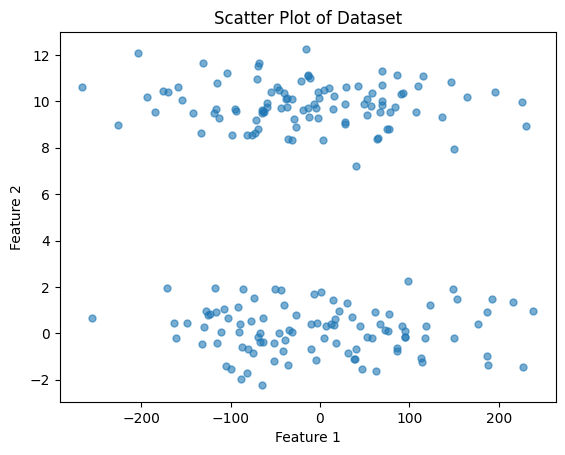

In [13]:
plt.scatter(X[:, 0], X[:, 1], s=25, alpha=0.6)
plt.title("Scatter Plot of Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Yes the dataset is clusterable however the effectiveensity is debatable due to the lesser dense clusters with widely distributed points

#### 1.3.  Describing the Numerical Variales

For each numerical variable in the dataframe, show the mean, standard deviation, minimum, Q1, median, Q3, and maxium value.

In [14]:
description = df.describe(percentiles=[0.25, 0.5, 0.75])
print(description)

                x           y
count  200.000000  200.000000
mean    -7.201801    5.014914
std     99.827520    4.980245
min   -265.917224   -2.223403
25%    -74.086095    0.149507
50%    -12.552231    4.734150
75%     64.092726    9.851294
max    238.314478   12.256723


#### 1.4. Hopkin's Statistic for Determining Clusterability
Calculate 5 Hopkin's statistics for this dataset. Do your results suggest that this dataset is clusterable? Explain.

In [22]:
X = df.to_numpy()
hopkins_values = [hopkins_stat(pd.DataFrame(X)) for _ in range(5)]

In [23]:
# Summarize the results
print("Hopkin's Statistic Values:", hopkins_values)
print("Mean Hopkin's Statistic:", np.mean(hopkins_values))

Hopkin's Statistic Values: [0.22694686716151213, 0.2849590565680449, 0.32678341658940885, 0.25680575744157735, 0.2255731472079472]
Mean Hopkin's Statistic: 0.2642136489936981


In [24]:
# Explanation and Conclusion
mean_hopkins = np.mean(hopkins_values)
if mean_hopkins > 0.75:
    print("The dataset is highly clusterable (Hopkin's statistic > 0.75).")
elif 0.5 <= mean_hopkins <= 0.75:
    print("The dataset has moderate clusterability (0.5 <= Hopkin's statistic <= 0.75).")
else:
    print("The dataset is not clusterable (Hopkin's statistic < 0.5).")

The dataset is not clusterable (Hopkin's statistic < 0.5).


Hopkin's Statistic < 0.5 indicates that the dataset is randomly distributed, lacking natural structure or dense regions necessary for meaningful clustering.

#### 1.5.  k-Means

Cluster this dataset into two clusters using k-means (and a random state of 100). Then, plot this two dimensional dataset again, color-coding the points by your resulting k-means cluster labels.

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=100, n_init=10)
labels = kmeans.fit_predict(X)

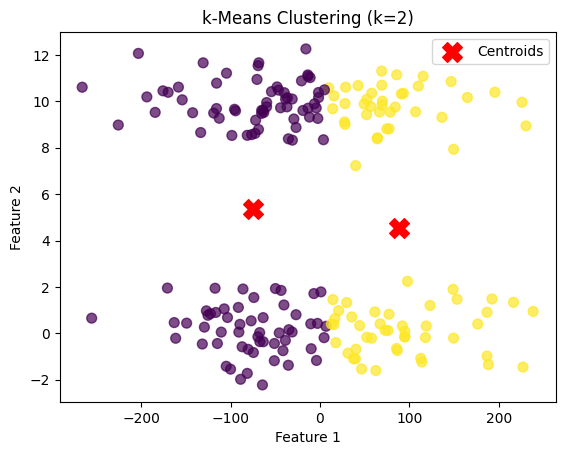

In [28]:
# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("k-Means Clustering (k=2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


#### 1.6. Clustering Assessment

Did k-means accurately identify the clusters in the dataset? If not, explain why.

**Hint: Try plotting the dataset with an x-axis lower bound of -300 and an upper bound of 300, and a y-axis lower bound of -300 and an upper bound of 300.**

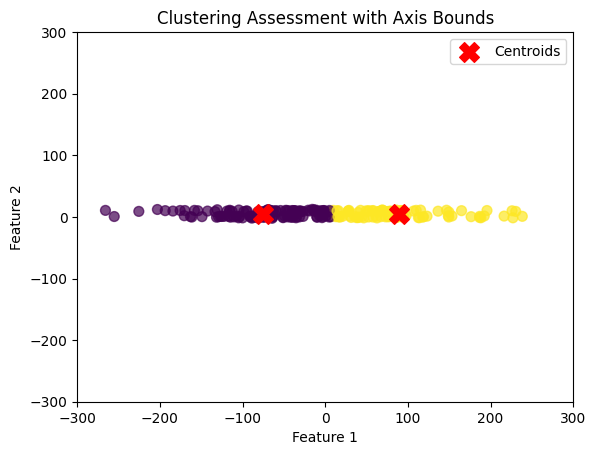

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlim(-300, 300)
plt.ylim(-300, 300)
plt.title("Clustering Assessment with Axis Bounds")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

**k-Means failed to identify meaningful clusters** because the dataset lacks inherent clusterability, as indicated by the Hopkin's statistic (<0.5).

The clusters formed are artificial and based on the algorithm's assumptions of spherical clusters, which do not align with the dataset's random distribution.

<hr>

### <u>Tutorial</u>: Variable Z-Score Scaling

We can scale the numerical attributes in each column of a dataframe by using the **StandardScaler()** function from the the **sklearn.preprocessing** package, followed by the **.fit_transform()** function.

Using the default **StandardScaler()** parameters, we standardize the variables by removing the mean and scaling to unit variance. Or in other words, we transform each observation $x$ in a given column to $z=\frac{x-\mbox{mean of column}}{\mbox{standard deviation of column}}$

In [15]:
import pandas as pd
tmp=pd.DataFrame({'col1':[100,109,99,97], 'col2': [1,6,3,8]})
tmp

,col1,col2
0,100,1
1,109,6
2,99,3
3,97,8


In [16]:
tmp.columns

Index(['col1', 'col2'], dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler
scaled_array=StandardScaler().fit_transform(tmp)
scaled_array

array([[-0.27156272, -1.29986737],
       [ 1.68368888,  0.55708601],
       [-0.4888129 , -0.55708601],
       [-0.92331326,  1.29986737]])

The output of the **StandardScaler().fit_transform()** is a numpy array. Let's put this scaled dataset back into dataframe form, using the same column names from the original tmp dataframe.

In [18]:
tmp_scaled=pd.DataFrame(scaled_array, columns=tmp.columns)
tmp_scaled

,col1,col2
0,-0.271563,-1.299867
1,1.683689,0.557086
2,-0.488813,-0.557086
3,-0.923313,1.299867


<hr>

### 2. Scaled Dataset Analysis

#### 2.1. Scale the dataset

Next, with our dataframe from 1.1, create a new dataframe that has standardized the variables by removing the mean and scaling to unit variance.

#### 2.2. Initial Plotting 
Plot this **scaled** dataframe in a scatterplot. Just by using this scatterplot, do you think that this scaled dataset is clusterable?

**Hint: In this problem, don't modify the upper or lower bound limits of the plot window.**

#### 2.3.  Describing the Numerical Variales

For each numerical variable in the **scaled** dataframe, show the mean, standard deviation, minimum, Q1, median, Q3, and maxium value.

#### 2.4.Hopkin's Statistic for Determining Clusterability
Calculate 5 Hopkin's statistics for this **scaled** dataset. Do your results suggest that this **scaled** dataset is more likely to be clusterable than the **unscaled** dataset?  Explain.


#### 2.5. Assumptions of the Hopkin's Statistic

If we had shifted all of the points in just the lower cloud of observations in this scaled dataset to the right by 5, would we expect the Hopkin's statistics and it's interpretations to change? If so, in what way?

#### 2.6. k-Means

Cluster this **scaled** dataset into two clusters using k-means (and a random state of 100). Then, plot this **scaled** two dimensional dataset again, color-coding the points by your resulting k-means cluster labels.

<hr>

## <u>Case Study 2</u>: Wheat Seed Analysis

Suppose that you are biologist working for an agricultural company. Specifically, you would like to learn more about some of the biological properties of three types of wheat seeds: Kama wheat seeds, Canadian wheat seeds, and Rosa wheat seeds.

The attached seeds.csv contains seven numerical attributes for 70 Kama seeds, 70 Canadian seeds, and 70 Rosa seeds. In this analysis we would like to answer the following research questions.

### <u>Research Questions</u>:

1. Does there exist a clustering structure in this dataset?
2. Which clustering algorithm (k-means vs. k-medoids) will yield a clustering with the most amount of cohesion and separation?
3. If our goal is to yield clusterings with high cohesion and separation, what number of clusters should we ask for in the k-means and k-medoids algorithms?
4. How similar are our k-means and k-medoids clusterings results to the seed class labels (ie. Kama, Canadian, and Rosa)?

### 1. Data Reading and Preprocessing

#### 1.1. Reading dataset

Read the `seeds_modified.csv` dataset into a dataframe. You can assume that this dataset has no missing values.

#### 1.2.  Summary Statistics

For each numerical variable in the dataframe, show the mean, standard deviation, minimum, Q1, median, Q3, and maxium value.

#### 1.3.  Attribute Influence in k-Means

If we were to apply k-means to this dataset, do you think that certain numerical variables in this dataset that are more likely to dominate the results of k-means more than others? Explain.

#### 1.4.  Scale the dataset

Create a copy of your seeds dataframe that is comprised of just the numerical variables. Then create a new dataframe (or overwrite this dataframe) that has scaled the numerical variables.

### 2. Basic Descriptive Analytics

Before performing cluster analysis, we would like to explore this dataset first by using some more basic descriptive analytics techniques.

#### 2.1. Attribute Relationships

First, for each pair of the 7 numerical attributes in this dataset, plot a scatterplot. Color-code the observations in each of these scatterplots by the seed class.

#### 2.2. Outliers

Do you think that this dataset has any outliers?

#### 2.3. Algorithm Selection

If this dataset were to have outliers, would k-means or k-medoids be a more appropriate algorithm to use to cluster the data? Assume that you did not want to have clusters with a very small number of observations in them.

### 3. Clusterability

Generate 5 Hopkin's statistics for this **scaled** dataset and comment on whether or not these Hopkin's statistics suggest that the dataset is clusterable.

### 4. Parameter Selection for k-Means

We would like to use k-means to cluster this **scaled** dataset. Let's use the average silhouette score to help us select the ideal number of clusters to ask k-means for.

#### 4.1. Average Silhouette Score Plot

Using k-means and clusterings with k=2,3,...,10 clusters, create an average silhoutte score plot for this **scaled** dataset (creating 3 k-means clusterings for each k value).

Each of your 3 runs of the k-means clustering algorithm (for a given k) should use the random states `100,101,102`

Code Hint: 

`for rs in [100,101,102]:`

#### 4.2. Interpretation

What number of clusters does the plot above suggest will yield the clustering with the best cohesion and separation, when using k-means?

### 5. k-means Cluster Analysis

Cluster your scaled seeds dataset into the number of k clusters that you selected above using k-means and a random state of 100.

### 6. Post-Cluster Analysis with k-means

#### 6.1. Cluster labels and pre-assigned class labels comparision

Calculate the adjusted rand score between the k-means clustering that you created in 5 and the seed class labels. Then interpret this value.

#### 6.2.  Calculate the average silhouette score of the clustering you created in 5.

#### 6.3.  Create a silhouette plot for the **scaled** dataset clustering that you created in 5.

#### 6.4.  Which cluster in the dataset has the worst cohesion and separation? Which cluster has the best? Explain.

#### 6.5. k-Means and the Scatterplots

For each pair of the 7 numerical attributes in this dataset, plot a scatterplot. Color-code the observations in each of these scatterplots by the `k-means cluster labels`.

### 7. Parameter Selection for k-Medoids

We would also like to use k-medoids to cluster this **scaled** dataset. Let's use the average silhouette score to help us select the ideal number of clusters to ask k-medoids for.

#### 7.1. Average Silhouette Score Plot

Using k-medoids and clusterings with k=2,3,...,10 clusters, create an average silhoutte score plot for this **scaled** dataset (creating `3` k-medoids clusterings for each k value).

Each of your 3 runs of the k-medoids clustering algorithm (for a given k) should use the random states `100,101,102`


#### 7.2. Interpretation

What number of clusters does the plot above suggest will yield the best clustering, when using k-medoids?

### 8. k-Medoids Cluster Analysis

Cluster your scaled seeds dataset into the number of k clusters that you selected above using k-medoids and a random state of 100.

### 9. Post-Cluster Analysis with k-means

#### 9.1. Cluster labels and pre-assigned class labels comparision

Calculate the adjusted rand score between the k-medoids clustering that you created in 8 and the seed class labels. Then interpret this value.

#### 9.2.  Calculate the average silhouette score of the clustering you created in 8.

#### 9.3.  Create a silhouette plot for the clustering that you created in 8.

#### 9.4.  Which cluster in the clustering had the objects with the worst cluster cohesion? Explain.

#### 9.5. k-Medoids and the Scatterplots

For each pair of the 7 numerical attributes in this dataset, plot a scatterplot. Color-code the observations in each of these scatterplots by the `k-medoids cluster labels`.

### 10. Clustering Comparison

Finally, let's compare the two clusterings that were created by the k-means clustering algorithm and the k-medoids clustering algorithm.

#### 10.1. Association with the Seed Class Labels

1. Which clustering had a stronger association with (ie. similarity to) the set of seed class labels? Explain.
2. Does this suggest that this clustering algorithm performed better with respect to our unsupervised learning research goal? Explain.

#### 10.2. Cohesion and Separation and Desired Type of Clustering Results

1. Did the k-means clustering or the k-medoids clustering have stronger cohesion and separation? Explain.
2. Suppose that the researcher conducting this analysis did not want any clusters with a very small number of observations in them, and instead preferred more balanced clusters. Which clustering would you choose in this case?